In [2]:
#using logistic regression
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
sd = pd.read_csv('spam.csv', encoding='ISO-8859-1')
sd.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
spam=len(sd[sd.v1=='spam'])
normal=len(sd[sd.v1=='ham'])
print("Total number of messages",spam+normal)
print("Number of spam messages",spam)
print("Number of normal messages",normal)

Total number of messages 5572
Number of spam messages 747
Number of normal messages 4825


In [5]:
sd['v1'] = sd['v1'].map({'ham': 1, 'spam': 0})
print(sd)

      v1                                                 v2 Unnamed: 2  \
0      1  Go until jurong point, crazy.. Available only ...        NaN   
1      1                      Ok lar... Joking wif u oni...        NaN   
2      0  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      1  U dun say so early hor... U c already then say...        NaN   
4      1  Nah I don't think he goes to usf, he lives aro...        NaN   
...   ..                                                ...        ...   
5567   0  This is the 2nd time we have tried 2 contact u...        NaN   
5568   1              Will Ì_ b going to esplanade fr home?        NaN   
5569   1  Pity, * was in mood for that. So...any other s...        NaN   
5570   1  The guy did some bitching but I acted like i'd...        NaN   
5571   1                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        N

In [6]:
sd = sd.rename(columns={'v1':'label','v2':'Text'})
print("Current columns:", sd.columns)

Current columns: Index(['label', 'Text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [7]:
sd = sd[['label', 'Text']].iloc[:, :2] 
print(sd.head())


   label                                               Text
0      1  Go until jurong point, crazy.. Available only ...
1      1                      Ok lar... Joking wif u oni...
2      0  Free entry in 2 a wkly comp to win FA Cup fina...
3      1  U dun say so early hor... U c already then say...
4      1  Nah I don't think he goes to usf, he lives aro...


In [8]:
avg_words_len=round(sum([len(i.split()) for i in sd['Text']])/len(sd['Text']))
print(avg_words_len)

15


In [9]:
s = set()
for sent in sd['Text']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print(total_words_length)

15585


In [10]:
x, y = np.asanyarray(sd['Text']), np.asanyarray(sd['label'])
new_sd = pd.DataFrame({'Text': x, 'label': y})
x_train, x_test, y_train, y_test = train_test_split(
    new_sd['Text'], new_sd['label'], test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((4457,), (4457,), (1115,), (1115,))

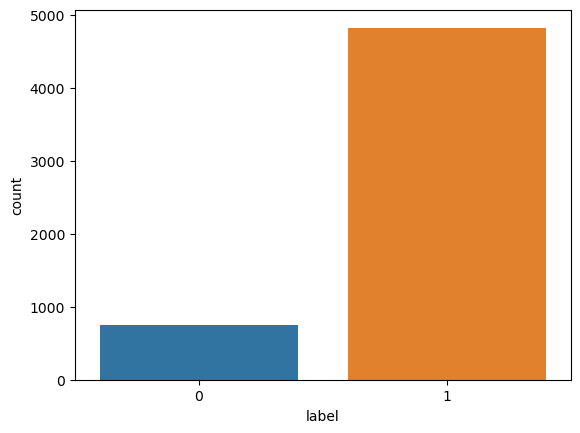

In [11]:
sns.countplot(x=sd['label'])
plt.show()


In [12]:
x = sd.drop(['Text'], axis=1)  
y = sd['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)
print("shape of x_train:",x_train.shape)
print("shape of x_test:",x_test.shape)


shape of x_train: (4179, 1)
shape of x_test: (1393, 1)


In [13]:
x_train.shape


(4179, 1)

In [14]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [15]:
y_pred=log_reg.predict(x_test)
log_reg_score = log_reg.score(x_test, y_test) * 100
print("logistic regression: ", log_reg_score)

logistic regression:  100.0


In [16]:
confusion_matrix(y_test,y_pred)

array([[ 180,    0],
       [   0, 1213]], dtype=int64)

In [17]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))
print("Evaluation of Random Forest Model")
print()
metrics(y_test, y_pred.round())

Evaluation of Random Forest Model

Accuracy: 1.00000
Precision: 1.00000
Recall: 1.00000
F1-score: 1.00000
